In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set the value of the home you are looking to buy
home_value = 350000

# What percentage are you paying up-front?
down_payment_percent = 0.25

# Calculate the dollar value of the down payment
down_payment = home_value * down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 87500.0
Mortgage Loan: 262500.0


In [3]:
mortgage_rate = 0.025

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1 + mortgage_rate) ** (1/12) - 1

# How many monthly payment periods will there be over 20 years?
mortgage_payment_periods = 20 * 12

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*npf.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 1387.39


In [4]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 540.71
Initial Principal Payment: 846.69


In [5]:
principal_remaining = np.empty([mortgage_payment_periods])

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i - 1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment-interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    print("Interest: $" + str(interest_payment) + " Principal: $" + str(round(principal_payment, 2))  + " Remaining: $" + str(round(principal_remaining[i], 2)))

Interest: $540.71 Principal: $846.68 Remaining: $261653.32
Interest: $538.96 Principal: $848.43 Remaining: $260804.89
Interest: $537.22 Principal: $850.17 Remaining: $259954.72
Interest: $535.46 Principal: $851.93 Remaining: $259102.79
Interest: $533.71 Principal: $853.68 Remaining: $258249.11
Interest: $531.95 Principal: $855.44 Remaining: $257393.67
Interest: $530.19 Principal: $857.2 Remaining: $256536.47
Interest: $528.42 Principal: $858.97 Remaining: $255677.5
Interest: $526.65 Principal: $860.74 Remaining: $254816.76
Interest: $524.88 Principal: $862.51 Remaining: $253954.25
Interest: $523.1 Principal: $864.29 Remaining: $253089.96
Interest: $521.32 Principal: $866.07 Remaining: $252223.89
Interest: $519.54 Principal: $867.85 Remaining: $251356.04
Interest: $517.75 Principal: $869.64 Remaining: $250486.4
Interest: $515.96 Principal: $871.43 Remaining: $249614.97
Interest: $514.17 Principal: $873.22 Remaining: $248741.75
Interest: $512.37 Principal: $875.02 Remaining: $247866.73
I

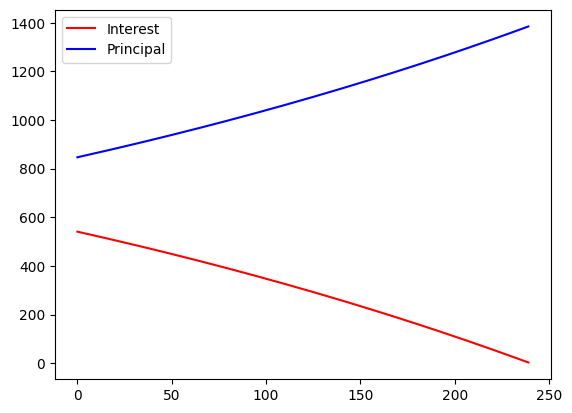

In [6]:
interest_paid = np.empty([mortgage_payment_periods])
principal_paid = np.empty([mortgage_payment_periods])

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red", label="Interest")
plt.plot(principal_paid, color="blue", label="Principal")
plt.legend()
plt.show()

[0.25241909 0.25484317 0.25727223 0.25970631 0.2621454  0.26458951
 0.26703866 0.26949286 0.27195211 0.27441643 0.27688583 0.27936031
 0.28183989 0.28432457 0.28681437 0.28930929 0.29180934 0.29431457
 0.29682494 0.29934049 0.3018612  0.30438711 0.30691823 0.30945457
 0.31199614 0.31454294 0.31709497 0.31965226 0.32221483 0.32478269
 0.32735583 0.32993426 0.332518   0.33510706 0.33770146 0.3403012
 0.34290629 0.34551674 0.3481326  0.35075383 0.35338046 0.35601249
 0.35864994 0.36129283 0.36394117 0.36659497 0.36925423 0.37191897
 0.3745892  0.37726491 0.37994614 0.38263291 0.3853252  0.38802303
 0.39072643 0.3934354  0.39614994 0.39887009 0.40159583 0.40432717
 0.40706414 0.40980677 0.41255503 0.41530897 0.41806857 0.42083386
 0.42360483 0.42638151 0.42916391 0.43195206 0.43474594 0.43754557
 0.44035097 0.44316217 0.44597914 0.44880191 0.45163051 0.45446494
 0.4573052  0.46015131 0.46300329 0.46586114 0.46872489 0.47159451
 0.47447006 0.47735151 0.48023891 0.48313226 0.48603157 0.48893

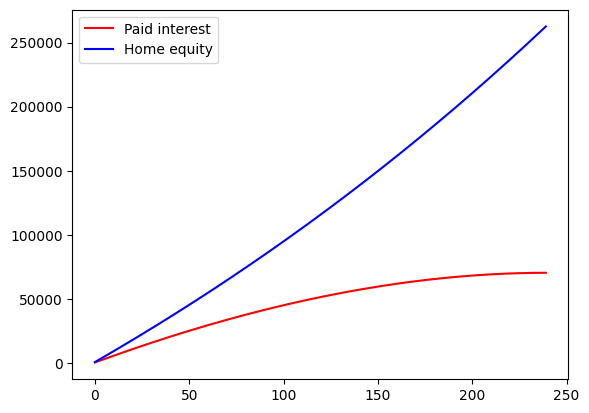

In [7]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = (down_payment/home_value) + (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red', label='Paid interest')
plt.plot(cumulative_home_equity, color='blue', label='Home equity')
plt.legend()
plt.show()

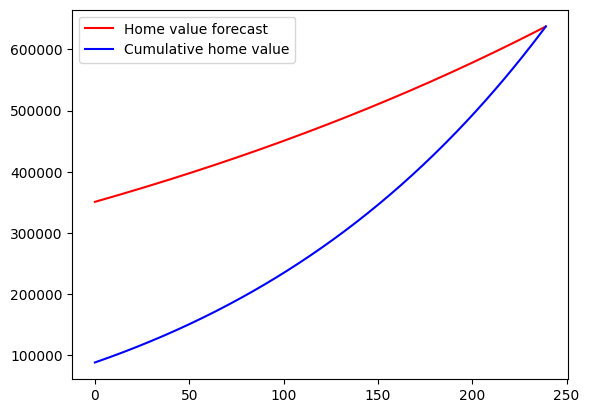

In [8]:
growth_array = np.full([mortgage_payment_periods], 0.0025)


# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast * cumulative_percent_owned

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red', label='Home value forecast')
plt.plot(cumulative_home_value_owned, color='blue', label='Cumulative home value')
plt.legend()
plt.show()

False    240
Name: count, dtype: int64


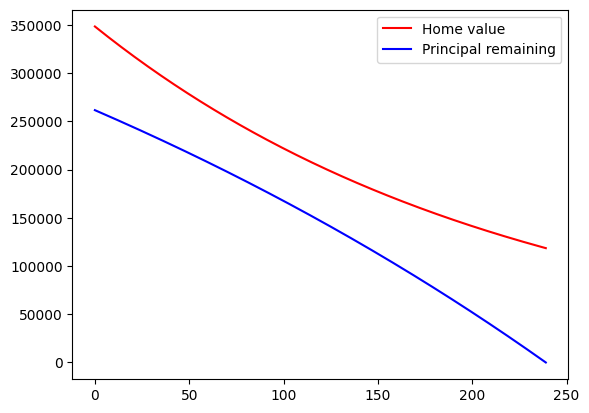

In [9]:
decline_array = np.full([mortgage_payment_periods], -0.0045)

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast
print(pd.value_counts(underwater))

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red', label='Home value')
plt.plot(principal_remaining, color='blue', label='Principal remaining')
plt.legend()
plt.show()